<h1 style="color:red;">Fecha entrega: Viernes 2 Mayo 2025</h1>

# Taller 2 - corte 2

# Perceptron

In [19]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Puntos a evaluar

- Realizar la implementacion de un perceptron que logre clasificar el set de datos propuesto
- Generar una funcion de predicciones
- Generar un mapa de calor que identifique las zonas predichas por el modelo en conjunto con el set de datos

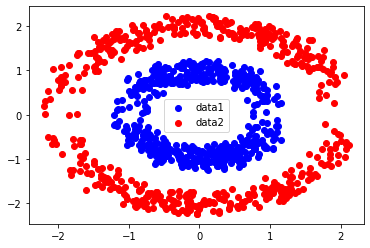

In [20]:
# generar data
data_1 = []
data_2 = []
for i in range(500):
    # data 1
    noise = 0.5
    radio = 1
    data1_random_x = (random.random()-0.5)*radio*2
    data1_y = math.sqrt( radio**2 - data1_random_x**2 )
    data_1.append( [data1_random_x+(random.random()-0.5)*noise , data1_y*random.sample([-1,1],1)[0]+(random.random()-0.5)*noise] )
    # data 2
    noise = 0.5
    radio = 2
    data2_random_x = (random.random()-0.5)*radio*2
    data2_y = math.sqrt( radio**2 - data2_random_x**2 )
    data_2.append( [data2_random_x+(random.random()-0.5)*noise , data2_y*random.sample([-1,1],1)[0]+(random.random()-0.5)*noise] )

# unificar data
X = data_1 + data_2
y = []
for _ in data_1:
    y.append(-1)
for _ in data_2:
    y.append(1)

plt.scatter( [d[0] for d in data_1], [d[1] for d in data_1], color="blue", label="data1" )
plt.scatter( [d[0] for d in data_2], [d[1] for d in data_2], color="red", label="data2" )
plt.legend()

In [21]:
# aqui tu implementacion

X_np = np.array(X)
y_np = np.array(y)

pesos = np.random.rand(2)
desplazamiento = 0
aprendizaje = 0.01

for _ in range(1000):
    for i in range(len(X_np)):
        entrada = X_np[i]
        suma = np.dot(entrada, pesos) + desplazamiento
        prediccion = 1 if suma >= 0 else -1
        error = y_np[i] - prediccion
        pesos += aprendizaje * error * entrada
        desplazamiento += aprendizaje * error

print("Pesos:", pesos)
print("desplazamiento:", desplazamiento)

Pesos: [-0.0165878   0.00110011]
desplazamiento: 0.06000000000000007


In [22]:
def predecir(x, y):
    suma = pesos[0] * x + pesos[1] * y + desplazamiento
    return 1 if suma >= 0 else -1

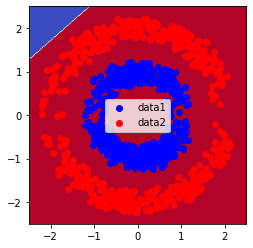

In [34]:
resolucion = 300
x_vals = np.linspace(-2.5, 2.5, resolucion)
y_vals = np.linspace(-2.5, 2.5, resolucion)
espaciopuntos = np.zeros((resolucion, resolucion))

for i in range(resolucion):
    for j in range(resolucion):
        x = x_vals[j]
        y = y_vals[i]
        espaciopuntos[i, j] = predecir(x, y)

plt.imshow(grid, extent=[-2.5, 2.5, -2.5, 2.5], origin='lower', cmap='coolwarm')
plt.scatter([d[0] for d in data_1], [d[1] for d in data_1], color="blue", label="data1")
plt.scatter([d[0] for d in data_2], [d[1] for d in data_2], color="red", label="data2")
plt.legend()
plt.show()